### <center> **CMSU Students Data Analysis** </center>

---

**<center> Author: Aravindan Natarajan </center>**
**<center>Version: 2.0</center>**

---

### **Data Summary**

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

### **1. Import the Required Libraries**
---

In [89]:
# Import basic packages
import pandas as pd
import numpy as np

# Import visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
%matplotlib inline

# Import statistical packages
from scipy.stats import variation
import statsmodels.graphics.mosaicplot as mosaicplot
from scipy.stats import chi2_contingency

# Warning handling
import warnings
warnings.filterwarnings('ignore')

### **2. Some Useful Functions**

In [2]:
# Annotation function to display the numbers above bar for bargraphs

def annotate_values(ax, orientation='v'):
  # Display counts at the top of the bars
  for p in ax.patches:
        if orientation == 'v':
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=8)

        elif orientation == 'h':
            ax.annotate(format(p.get_width(), '.0f'),
                        (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='left', va='center',
                        xytext=(5, 0),
                        textcoords='offset points',
                        fontsize=8)

In [3]:
# Function for plotting a countplot

def plot_countplot(df, column, hue=None, hue_order=None):
  plt.figure(figsize=(10, 6))

  # If hue is provided, use it in the countplot
  if hue:
    counts = df.groupby([column, hue]).size().reset_index(name='count')
    order = counts.sort_values('count', ascending=False)[column].unique()
    ax = sns.countplot(x=column, data=df, order=order, hue=hue, hue_order=hue_order)
  else:
    counts = df[column].value_counts().sort_values(ascending=False)
    ax = sns.countplot(x=column, data=df, order=counts.index)

  plt.xticks(rotation=90)
  plt.title(f'Count Plot of {column}')
  plt.xlabel(f'{column}')
  plt.ylabel(f'Count of {column}')
  annotate_values(ax)
  plt.show()

In [4]:
# Function similar to plot_countplot named as plot_barplot

def plot_barplot(df, x_col, y_col, hue=None, hue_order=None):
    plt.figure(figsize=(10, 6))

    # Sort x_col values in ascending order
    order = df[x_col].sort_values().unique()

    if hue:
        ax = sns.barplot(x=x_col, y=y_col, data=df, hue=hue, hue_order=hue_order, order=order, palette='Set1',ci=None)  # ci=None removes error bars
    else:
        ax = sns.barplot(x=x_col, y=y_col, data=df, order=order, palette='Set1', ci=None)

    plt.xticks(rotation=90)
    plt.title(f'Bar Plot of {y_col} vs {x_col}')
    plt.xlabel(f'{x_col}')
    plt.ylabel(f'{y_col}')
    annotate_values(ax)
    plt.show()


In [70]:
# Function to annotate a Seaborn box plot with quartiles, IQR, maximum, and minimum values.

def annotate_boxplot(data_series, ax=None):

    # Calculate quartiles and IQR
    q1, q2, q3 = data_series.quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1

    # Get minimum and maximum values
    data_min = data_series.min()
    data_max = data_series.max()

    # Get plot limits
    x_min, x_max = ax.get_xlim()
    x_range = x_max - x_min

    # Adjust figure size based on x-range
    fig = plt.gcf()
    fig.set_size_inches(10 + x_range/20, 5)  # Adjust these values as needed

    # Annotate quartiles and IQR without arrows
    ax.text(q1, -0.3, f"Q1: {q1:.2f}", ha='center')
    ax.text(q2, 0.3, f"Q2 (Median): {q2:.2f}", ha='center')
    ax.text(q3, -0.4, f"Q3: {q3:.2f}", ha='center')
    ax.text((q1+q3)/2, 0.2, f"IQR: {iqr:.2f}", ha='center', va='center')

    # Annotate minimum and maximum without arrows
    ax.text(data_min, -0.2, f"Min: {data_min:.2f}", ha='center')
    ax.text(data_max, 0.1, f"Max: {data_max:.2f}", ha='center')

    return ax

### **2. Data Loading**

In [7]:
cmsu_df=pd.read_csv('/content/drive/MyDrive/PGP-DSBA/Statistical Methods for Decision Making/Week 4/Survey.csv')
cmsu_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


### **3. Exploratory Data Analysis**

In [8]:
# Statistical summary of the datasets
cmsu_df[['GPA',	'Salary',	'Spending', 'Text Messages']].describe().T

,count,mean,std,min,25%,50%,75%,max
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0


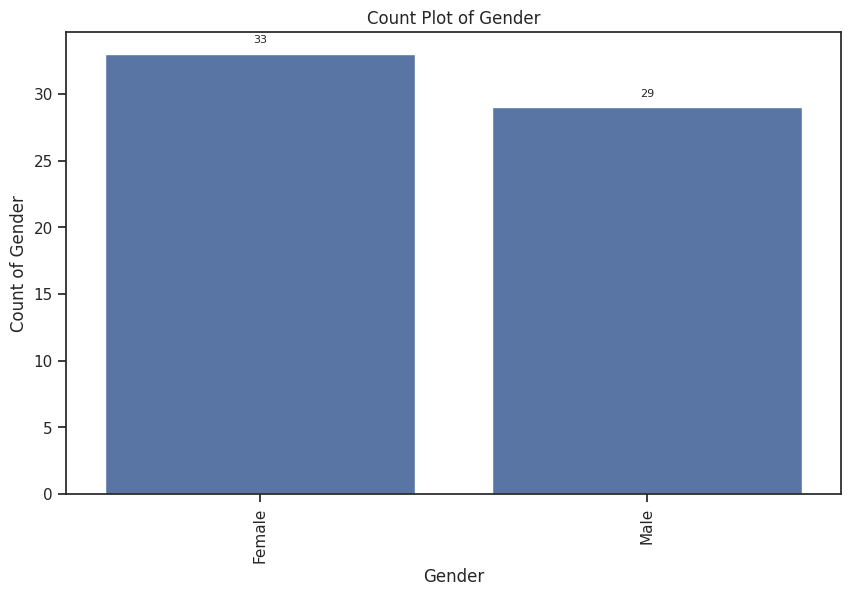

In [9]:
# Visualization of the Gender column
plot_countplot(cmsu_df, 'Gender')

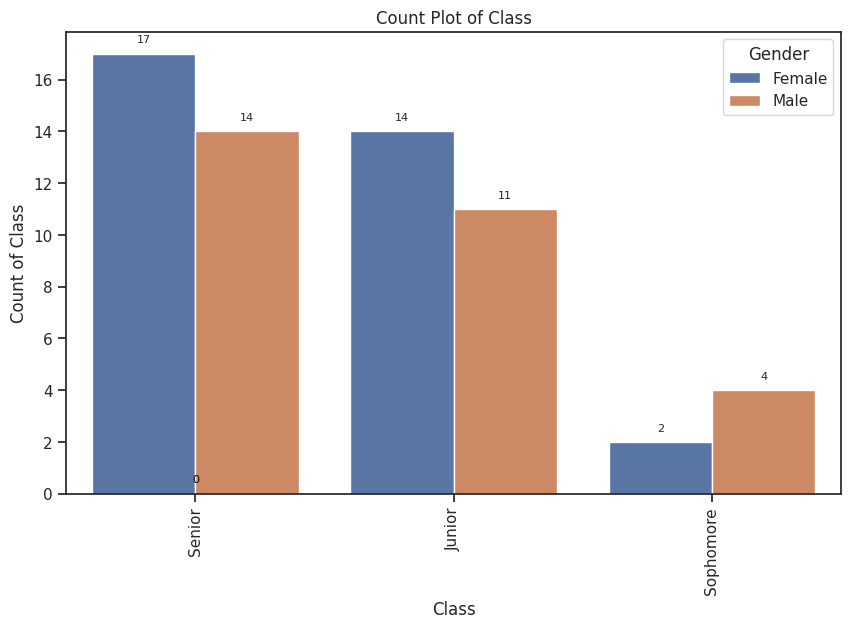

In [12]:
# Visualization of the Class column
plot_countplot(cmsu_df, 'Class', hue='Gender')

A crosstab (also known as a contingency table) is a table that displays the frequency distribution of two or more categorical variables. It is used to summarize and analyze the relationship between these variables by showing the number of observations that fall into each combination of categories. This allows us to identify patterns, associations, and dependencies between the variables.

In [31]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Major'],margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


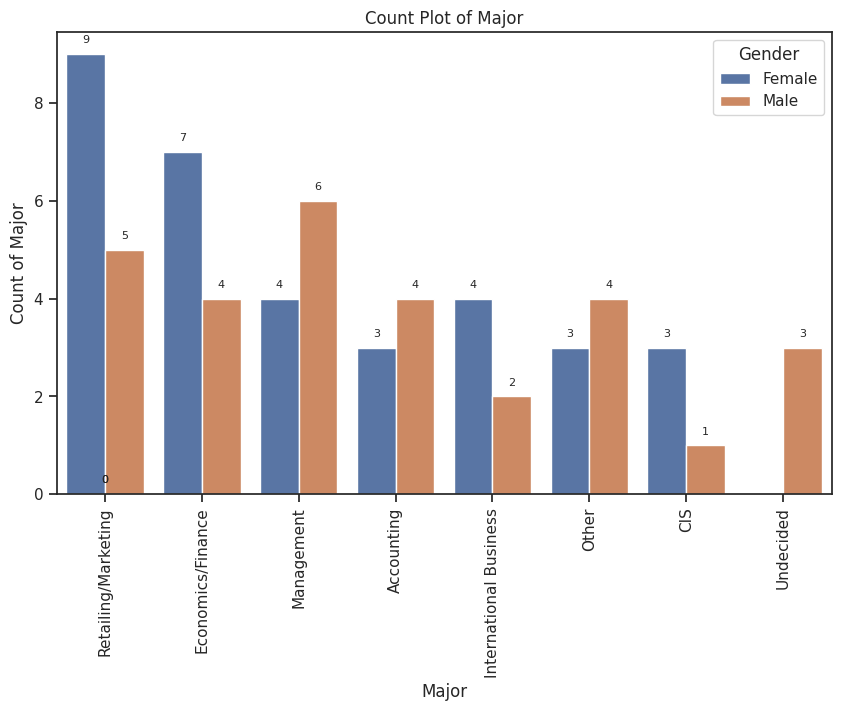

In [13]:
# Visulaization of the Major column
plot_countplot(cmsu_df, 'Major', hue='Gender')

In [32]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Grad Intention'],margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


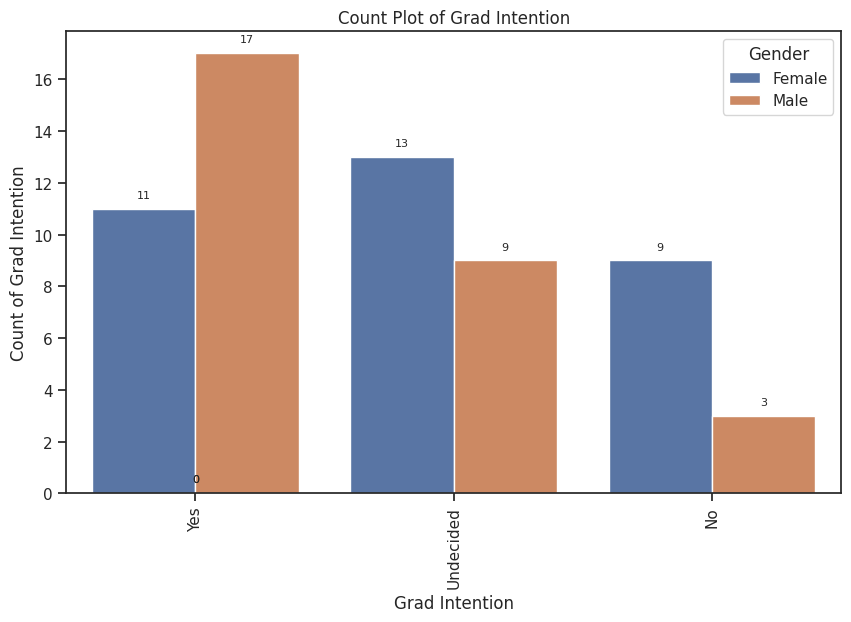

In [14]:
# Visualization of the Grad Intention column
plot_countplot(cmsu_df, 'Grad Intention', hue='Gender')

In [33]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Employment'],margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


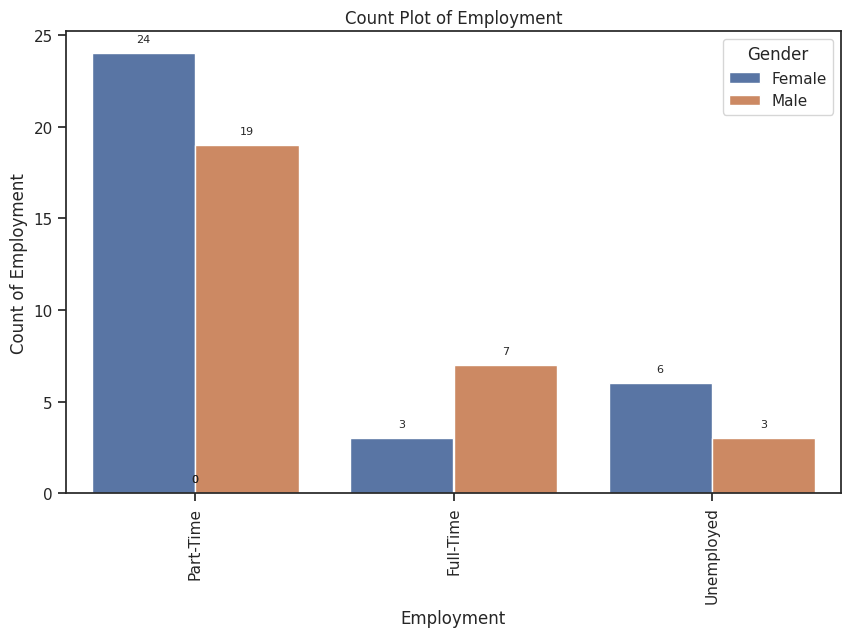

In [15]:
# Visualization of the Employment column
plot_countplot(cmsu_df, 'Employment', hue='Gender')

In [34]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Computer'],margins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


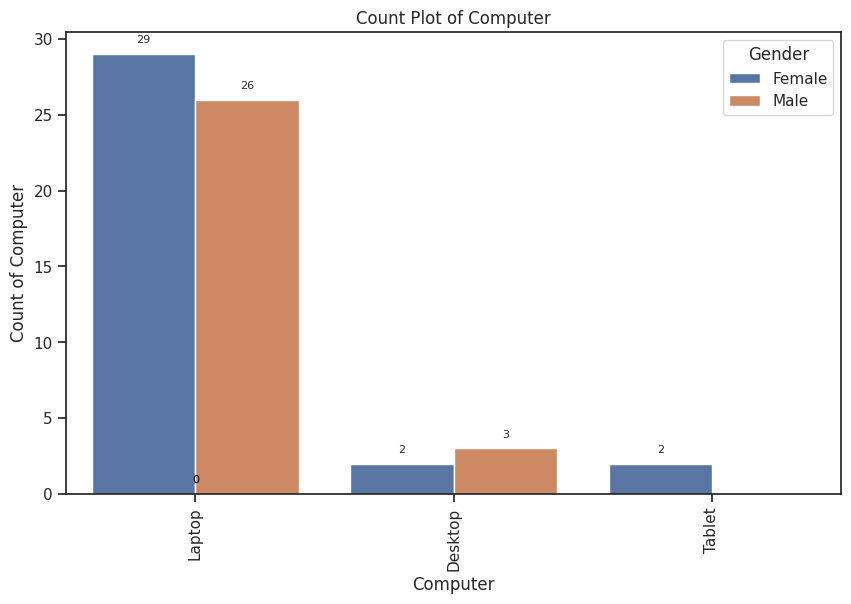

In [16]:
# Visulaization of the Computer column
plot_countplot(cmsu_df, 'Computer', hue='Gender')

**Summary**

* **Gender:** Shows the distribution of male and female students in the dataset. In the given dataset, female students are more than the male students.

* **Class:** Displays the distribution of students across different classes (e.g., Freshman, Sophomore, Junior, Senior), further broken down by gender. It is evident that more senior students participated in the survey

* **Major:** Illustrates the distribution of students across various majors, again categorized by gender. It helps identify popular majors among male and female students. Based on the results, Retailing/Marketing is the popular major

* **Grad Intention:** Shows the proportion of students intending to graduate, also categorized by gender. This plot provides insights into the graduation plans of male and female students. It is heartening to see that more students are intended to graduate

* **Employment:** Depicts the employment status of students (e.g., Full-Time, Part-Time, Unemployed), categorized by gender. Most of the students are working part-time

* **Computer:** Illustrates the type of computer used by students (e.g., Desktop, Laptop), also categorized by gender. Most students use laptops for their needs.

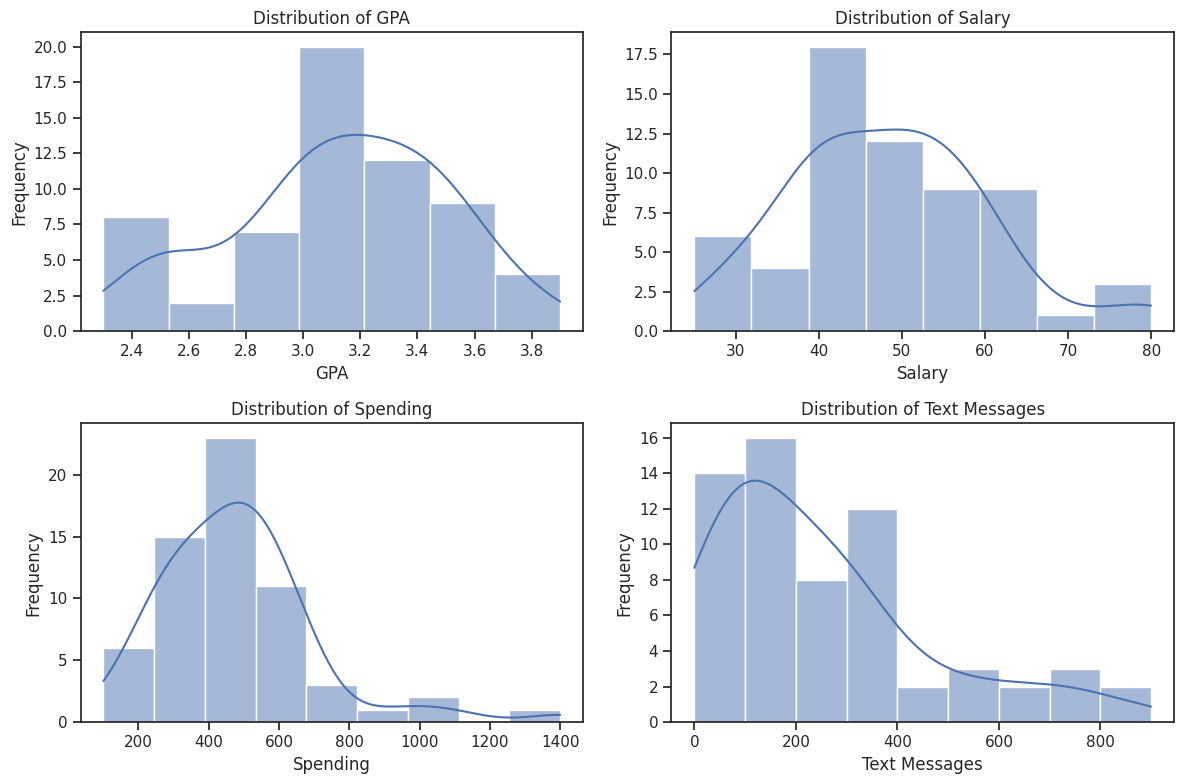

In [21]:
# Visualization of the numerical variables

# Assuming your dataframe is named 'cmsu_df' and contains the numerical columns 'GPA', 'Salary', 'Spending', and 'Text Messages'
numerical_vars = ['GPA', 'Salary', 'Spending', 'Text Messages']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figsize as needed

# Iterate through numerical variables and plot histograms
for i, var in enumerate(numerical_vars):
    row = i // 2  # Determine subplot row
    col = i % 2   # Determine subplot column
    sns.histplot(data=cmsu_df, x=var, ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

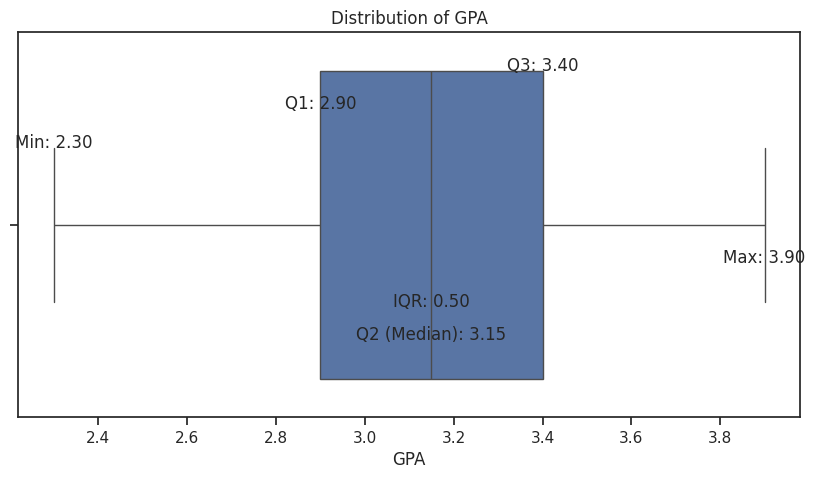

In [71]:
# Visualize the GPA as a box plot
ax1 = sns.boxplot(data=cmsu_df['GPA'], orient='h');
annotate_boxplot(cmsu_df['GPA'], ax=ax1)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.show()

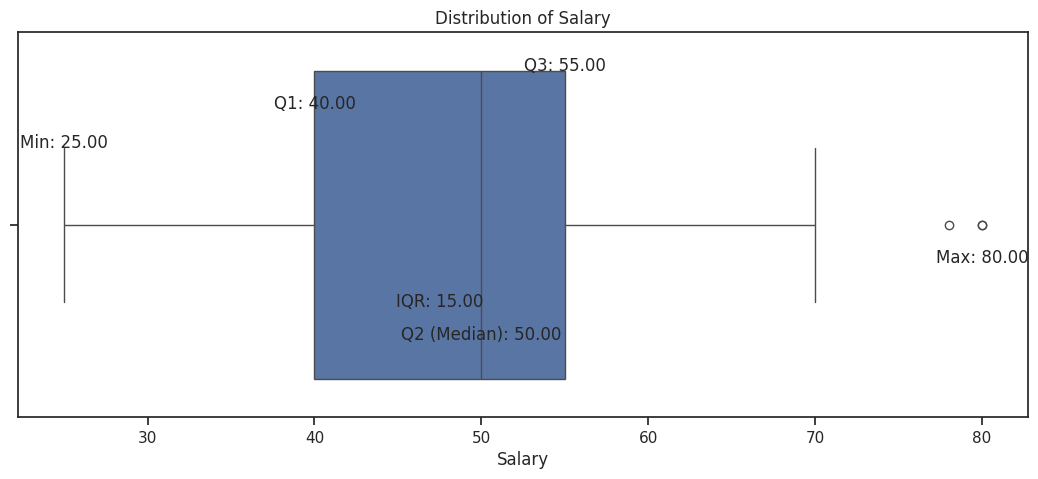

In [72]:
# Visualize Salary as boxplot
ax2 = sns.boxplot(data=cmsu_df['Salary'], orient='h');
annotate_boxplot(cmsu_df['Salary'], ax=ax2)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.show()

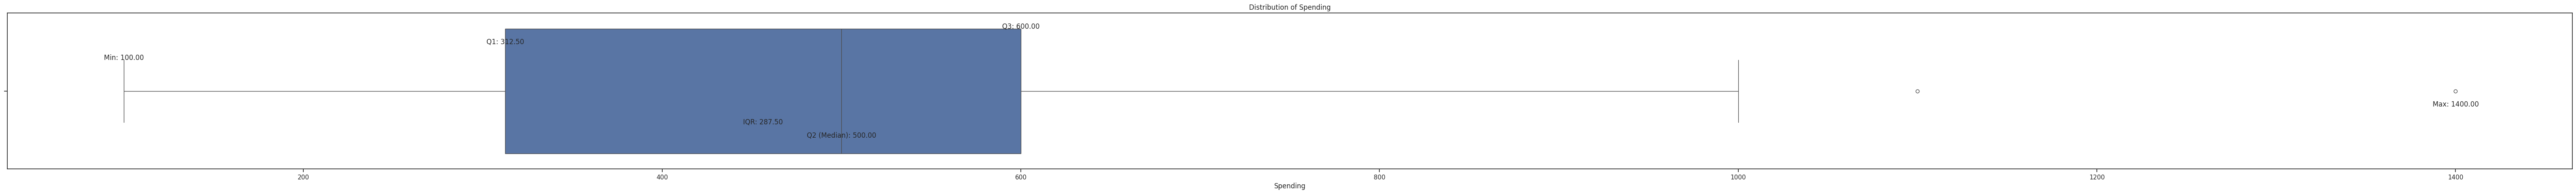

In [73]:
# Visualize Spending as a boxplot
ax3 = sns.boxplot(data=cmsu_df['Spending'], orient='h');
annotate_boxplot(cmsu_df['Spending'], ax=ax3)
plt.title('Distribution of Spending')
plt.xlabel('Spending')
plt.show()

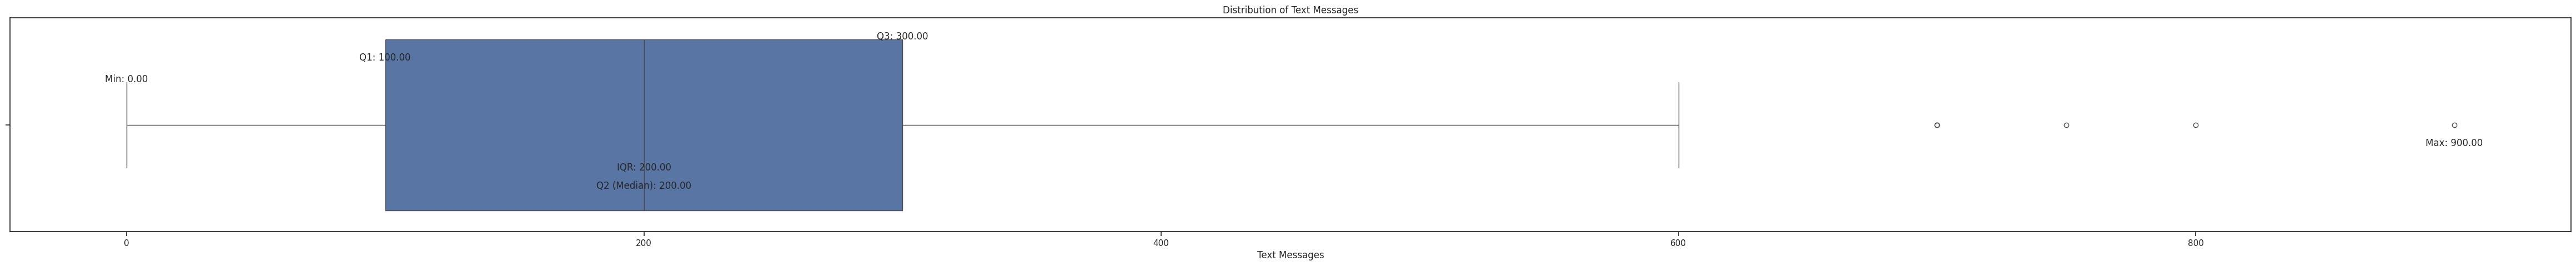

In [74]:
# Visualization of Text Messages as boxplot
ax4 = sns.boxplot(data=cmsu_df['Text Messages'], orient='h');
annotate_boxplot(cmsu_df['Text Messages'], ax=ax4)
plt.title('Distribution of Text Messages')
plt.xlabel('Text Messages')
plt.show()

**Summary**

**GPA:**

* **Shape:** The distribution of GPA appears to be roughly bell-shaped, but with a slight skew towards the higher end (right skew). This suggests that most students have GPAs around the average, with a smaller number of students having very high GPAs.
* **Center:** The center of the distribution appears to be around 3.2-3.4, which is likely the average GPA for CMSU students.
* **Spread:** The spread of the distribution is relatively moderate, indicating that there is some variability in GPA among the students.

**Salary:**

* **Shape:** The distribution of Salary is highly right-skewed, meaning that most students earn lower salaries, and there are a few outliers with very high salaries.
* **Center:** The center of the distribution is difficult to determine due to the skew, but it's likely around $30,000-$$30,000-$40,000.
* **Spread:** The spread is large, with a wide range of salaries reported by the students.

**Spending:**

* **Shape:** Similar to Salary, the distribution of Spending is also highly right-skewed. This indicates that most students spend a lower amount, with a few outliers spending significantly more.
* **Center:** The center of the distribution is likely around $200-$$200-$300.
* **Spread:** The spread is large, reflecting the variability in student spending habits.

**Text Messages:**

* **Shape:** The distribution of Text Messages is somewhat bell-shaped but with a slight right skew. This suggests that most students send a moderate number of text messages, with a smaller number sending a very high volume of messages.
* **Center:** The center of the distribution appears to be around 50-70 text messages per day.
* **Spread:** The spread is moderate, indicating that there is some variability in the number of text messages sent by students.

**Overall:**

The histograms reveal that GPA is relatively normally distributed, while Salary, Spending, and Text Messages exhibit right skew. This information is important for understanding the characteristics of these numerical variables and can guide further analysis and decision-making. Please note that the the sample size is relatively small, so these observations should be interpreted with caution.

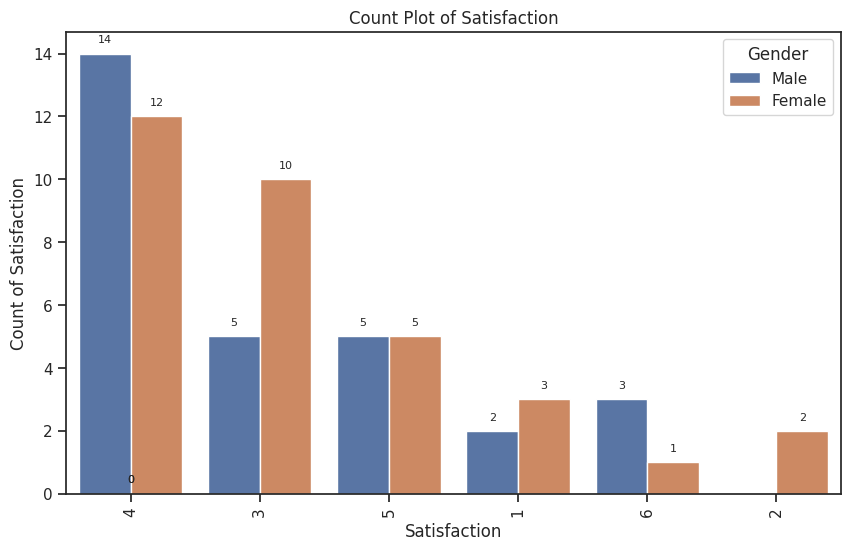

In [23]:
# Visualization of the Satisfaction
plot_countplot(cmsu_df, 'Satisfaction', hue='Gender')

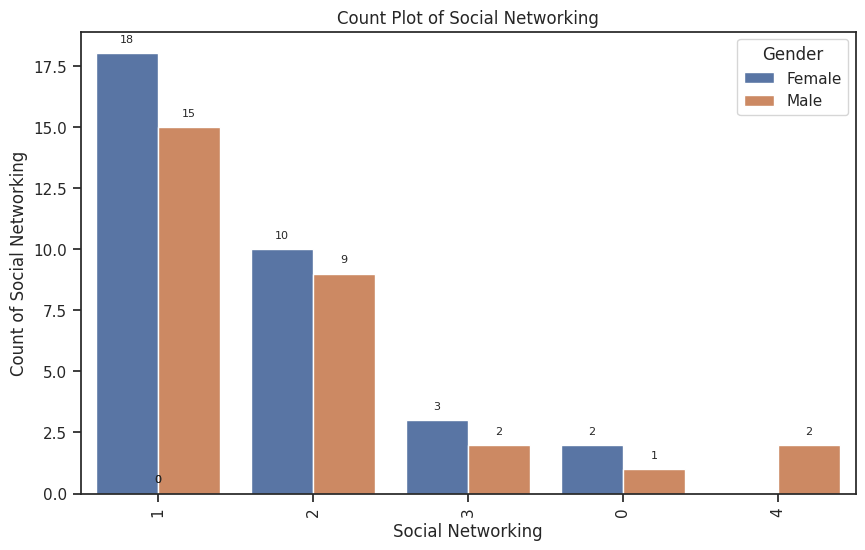

In [24]:
# Visualization of the Social Networking
plot_countplot(cmsu_df, 'Social Networking', hue='Gender')

**Summary**

**Satisfaction:**

* The countplot for "Satisfaction" shows the distribution of student satisfaction levels.
* The majority of students reported being either "Neutral" or "Satisfied," with a smaller proportion indicating "Very Dissatisfied" or "Very Satisfied."
* This suggests that overall, there's a moderate level of satisfaction among CMSU students, with room for improvement.

**Social Networking:**

* The countplot for "Social Networking" reveals the usage patterns of social media among students.
* Most students reported using social networking platforms "Frequently" or "Average," with a smaller number indicating "Very Frequently" or "Not at All."
* This indicates that social networking is quite prevalent among CMSU students, with most engaging in it regularly.

**Key takeaways:**

* Satisfaction levels are generally moderate among students, but there are opportunities for improvement.
* Social networking usage is common among students, with most using platforms frequently or on average.

### **4. Probability Analysis**

In [78]:
# Calculate the probability of a randomly selected student being male
male_count = cmsu_df[cmsu_df['Gender'] == 'Male'].shape[0]
total_students = cmsu_df.shape[0]
probability_male = male_count / total_students

print(f"The probability of a randomly selected CMSU student being male is: {round(probability_male*100,2)} %")

The probability of a randomly selected CMSU student being male is: 46.77 %


In [79]:
# Calculate the probability of a randomly selected student being female
female_count = cmsu_df[cmsu_df['Gender'] == 'Female'].shape[0]
total_students = cmsu_df.shape[0]
probability_female = female_count / total_students

print(f"The probability of a randomly selected CMSU student being female is: {round(probability_female*100,2)} %")

The probability of a randomly selected CMSU student being female is: 53.23 %


In [82]:
# Calculate the conditional probabilities of all male students across different majors assuming the sample is the representation of CMSU
male_df = cmsu_df[cmsu_df['Gender'] == 'Male']
total_males = len(male_df)

majors = male_df['Major'].unique()
for major in majors:
  major_count = len(male_df[male_df['Major'] == major])
  prob = major_count / total_males
  print(f"The conditional probability of a student majoring in {major} given that the student is male is: {round(prob*100,2)} %")

The conditional probability of a student majoring in Management given that the student is male is: 20.69 %
The conditional probability of a student majoring in Other given that the student is male is: 13.79 %
The conditional probability of a student majoring in CIS given that the student is male is: 3.45 %
The conditional probability of a student majoring in Undecided given that the student is male is: 10.34 %
The conditional probability of a student majoring in International Business given that the student is male is: 6.9 %
The conditional probability of a student majoring in Economics/Finance given that the student is male is: 13.79 %
The conditional probability of a student majoring in Accounting given that the student is male is: 13.79 %
The conditional probability of a student majoring in Retailing/Marketing given that the student is male is: 17.24 %


In [83]:
# Calculate the conditional probabilities of all female students across different majors assuming the sample is the representation of CMSU
female_df = cmsu_df[cmsu_df['Gender'] == 'Female']
total_females = len(female_df)

majors = female_df['Major'].unique()
for major in majors:
  major_count = len(female_df[female_df['Major'] == major])
  prob = major_count / total_females
  print(f"The conditional probability of a student majoring in {major} given that the student is female is: {round(prob*100,2)} %")


The conditional probability of a student majoring in Other given that the student is female is: 9.09 %
The conditional probability of a student majoring in Economics/Finance given that the student is female is: 21.21 %
The conditional probability of a student majoring in Management given that the student is female is: 12.12 %
The conditional probability of a student majoring in CIS given that the student is female is: 9.09 %
The conditional probability of a student majoring in Retailing/Marketing given that the student is female is: 27.27 %
The conditional probability of a student majoring in International Business given that the student is female is: 12.12 %
The conditional probability of a student majoring in Accounting given that the student is female is: 9.09 %


In [84]:
# Calculate the probability of a male student intending to graduate
male_grad_count = len(cmsu_df[(cmsu_df['Gender'] == 'Male') & (cmsu_df['Grad Intention'] == 'Yes')])
total_students = len(cmsu_df)
probability_male_grad = male_grad_count / total_students

print(f"The probability that a randomly chosen student is a male and intends to graduate is: {round(probability_male_grad*100,2)} %")

The probability that a randomly chosen student is a male and intends to graduate is: 27.42 %


In [85]:
# Calculate the probability of a female student NOT having a laptop
female_no_laptop_count = len(cmsu_df[(cmsu_df['Gender'] == 'Female') & (cmsu_df['Computer'] != 'Laptop')])
total_students = len(cmsu_df)
probability_female_no_laptop = female_no_laptop_count / total_students

print(f"The probability that a randomly selected student is female and does not have a laptop is: {round(probability_female_no_laptop*100,2)} %")

The probability that a randomly selected student is female and does not have a laptop is: 6.45 %


In [87]:
# Calculate the probability of a student being male
male_count = cmsu_df[cmsu_df['Gender'] == 'Male'].shape[0]
total_students = cmsu_df.shape[0]
prob_male = male_count / total_students

# Calculate the probability of a student having full-time employment
full_time_count = cmsu_df[cmsu_df['Employment'] == 'Full-Time'].shape[0]
prob_full_time = full_time_count / total_students

# Calculate the probability of a student being male AND having full-time employment
male_full_time_count = cmsu_df[(cmsu_df['Gender'] == 'Male') & (cmsu_df['Employment'] == 'Full-Time')].shape[0]
prob_male_full_time = male_full_time_count / total_students

# Calculate the probability of a student being male OR having full-time employment using the formula:
# P(A or B) = P(A) + P(B) - P(A and B)
prob_male_or_full_time = prob_male + prob_full_time - prob_male_full_time

print(f"The probability that a randomly chosen student is a male or has full-time employment is: {round(prob_male_or_full_time*100,2)} %")

The probability that a randomly chosen student is a male or has full-time employment is: 51.61 %


In [88]:
# Calculate the number of female students
female_students = len(cmsu_df[cmsu_df['Gender'] == 'Female'])

# Calculate the number of female students majoring in international business or management
ib_or_management_females = len(cmsu_df[(cmsu_df['Gender'] == 'Female') & (cmsu_df['Major'].isin(['International Business', 'Management']))])

# Calculate the conditional probability
conditional_probability = ib_or_management_females / female_students

print(f"The conditional probability that a randomly chosen female student is majoring in international business or management is: {round(conditional_probability*100,2)} %")


The conditional probability that a randomly chosen female student is majoring in international business or management is: 24.24 %


In [91]:
# Is the graduate intention and being female are independent events?

# Create the contingency table
contingency_table = pd.crosstab(cmsu_df['Gender'], cmsu_df['Grad Intention'])

# Filter out 'Undecided' responses
contingency_table = contingency_table.drop('Undecided', axis=1)

print(contingency_table)

# Calculate expected frequencies assuming independence

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:\n", expected)

alpha = 0.05  # significance level
print("\nAre graduate intention and being female independent events?")

if p < alpha:
    print(f"No. The p-value ({p}) is less than the significance level ({alpha}). We reject the null hypothesis of independence.")
else:
    print(f"Yes. The p-value ({p}) is greater than or equal to the significance level ({alpha}). We fail to reject the null hypothesis of independence.")


Grad Intention  No  Yes
Gender                 
Female           9   11
Male             3   17

Chi-square statistic: 2.9761904761904767
P-value: 0.08449793972392967
Degrees of freedom: 1

Expected frequencies:
 [[ 6. 14.]
 [ 6. 14.]]

Are graduate intention and being female independent events?
Yes. The p-value (0.08449793972392967) is greater than or equal to the significance level (0.05). We fail to reject the null hypothesis of independence.


In [94]:
# If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

# Calculate the number of students with GPA less than 3
gpalessthan3 = len(cmsu_df[cmsu_df['GPA'] < 3])

# Calculate the total number of students
total_students = len(cmsu_df)

# Calculate the probability
probability_gpa_less_than_3 = gpalessthan3 / total_students

print(f"The probability that a randomly chosen student has a GPA less than 3 is: {round(probability_gpa_less_than_3*100,2)} %")

The probability that a randomly chosen student has a GPA less than 3 is: 27.42 %


In [96]:
# Find conditional probability that a randomly selected male and female earns 50 or more.

# Calculate the number of male students with salary >= 50
male_high_earners = len(cmsu_df[(cmsu_df['Gender'] == 'Male') & (cmsu_df['Salary'] >= 50)])

# Calculate the total number of male students
total_males = len(cmsu_df[cmsu_df['Gender'] == 'Male'])

# Calculate the conditional probability for males
conditional_prob_male = male_high_earners / total_males if total_males > 0 else 0

print(f"Conditional probability of a male earning 50 or more: {round(conditional_prob_male*100,2)} %")

# Calculate the number of female students with salary >= 50
female_high_earners = len(cmsu_df[(cmsu_df['Gender'] == 'Female') & (cmsu_df['Salary'] >= 50)])

# Calculate the total number of female students
total_females = len(cmsu_df[cmsu_df['Gender'] == 'Female'])

# Calculate the conditional probability for females
conditional_prob_female = female_high_earners / total_females if total_females > 0 else 0

print(f"Conditional probability of a female earning 50 or more: {round(conditional_prob_female*100,2)} %")


Conditional probability of a male earning 50 or more: 48.28 %
Conditional probability of a female earning 50 or more: 54.55 %


### **Business Recommendations**

**Regarding Student Demographics and Academic Choices:**

* **Focus on Retention and Graduation for Male Students:** Since there is a higher probability of male students intending to graduate, consider providing targeted support and resources to male students to ensure they achieve their academic goals and increase their retention rates. This could include mentorship programs, career counseling services, and academic support initiatives.

* **Address Laptop Access for Female Students:** Given the probability of female students not having a laptop, initiatives to improve laptop access for them could be implemented. This could involve providing financial assistance for laptop purchases, establishing loaner programs, or ensuring access to computer labs on campus. This will bridge the digital divide and support their academic progress.

* **Enhance International Business/Management Programs for Females:** Considering the conditional probability of female students majoring in international business or management, enhancing these programs or introducing relevant initiatives to attract more female students to these fields could be beneficial. This might involve organizing workshops, networking events, or highlighting successful female professionals in these areas.

**Regarding Student Employment and Financial Well-being:**

* **Optimize Employment-Related Programs:** Given the probability of male students having full-time employment, consider offering flexible programs and support services to accommodate the needs of working students and promote their academic success. This could include online courses, evening classes, or flexible scheduling options.

* **Understand Student Spending Behavior:** Analyzing the distribution of student spending can identify potential opportunities for revenue generation. This could involve offering discounts or bundled services catering to their needs, such as student discounts at local businesses or package deals for on-campus services.

**Regarding Student Satisfaction and Engagement:**

* **Improve Overall Student Satisfaction:** Considering the moderate satisfaction levels among students, focus on implementing initiatives to enhance overall satisfaction. This could involve conducting student surveys to gather feedback, improving communication channels between students and faculty, and providing more opportunities for student involvement in decision-making processes.

* **Leverage Social Networking for Engagement:** Given the prevalent use of social networking among students, consider leveraging these platforms to engage with students and promote university initiatives. This could include creating official university accounts on popular platforms, organizing online events, and using social media for announcements and updates.

By implementing these recommendations, CMSU can better cater to the needs of its students, improve their academic experience, and enhance the overall university environment.